## Load Data

Load the MNIST data, which comes pre-loaded with TensorFlow.

You do not need to modify this section.

In [1]:
from tensorflow.examples.tutorials.mnist import input_data
from sklearn.model_selection import train_test_split
import pickle

# pickle file locations
training_file = 'train.p'
testing_file = 'test.p'

# load pickle data
with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)


assert(len(X_train) == len(y_train))
assert(len(X_validation) == len(y_validation))
assert(len(X_test) == len(y_test))

print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_validation)))
print("Test Set:       {} samples".format(len(X_test)))



Image Shape: (32, 32, 3)

Training Set:   31367 samples
Validation Set: 7842 samples
Test Set:       12630 samples


## Visualize Data

View a sample from the dataset.

You do not need to modify this section.

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
import cv2

def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
def norml(image):
    #normalize to between -0.5 and 0.5 and output in float
    cv2.normalize(image, image, alpha=-0.5, beta=0.5, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F) 
    return image
    
# def canny(img, low_threshold, high_threshold):
#     """Applies the Canny transform"""
#     return cv2.Canny(img, low_threshold, high_threshold)

# %matplotlib inline

# Covert to grayscale and normalize histogram and scale to 0.5 to 0.5
X_train = np.array([norml(cv2.equalizeHist(grayscale(image))) for image in X_train])
X_train = X_train[..., np.newaxis]
X_validation = np.array([norml(cv2.equalizeHist(grayscale(image))) for image in X_validation])
X_validation = X_validation[..., np.newaxis]
X_test = np.array([norml(cv2.equalizeHist(grayscale(image))) for image in X_test])
X_test = X_test[..., np.newaxis]


# # Covert to grayscale
# X_train = np.array([grayscale(image) for image in X_train])
# X_train = X_train[..., np.newaxis]
# X_validation = np.array([grayscale(image) for image in X_validation])
# X_validation = X_validation[..., np.newaxis]
# X_test = np.array([grayscale(image) for image in X_test])
# X_test = X_test[..., np.newaxis]

# # try normalization with builtin tf function
# X_train = tf.image.per_image_whitening(X_train)
# X_validation = tf.image.per_image_whitening(X_validation)
# X_test = tf.image.per_image_whitening(X_test)



38
(31367, 32, 32, 1)


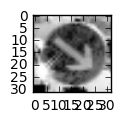

In [3]:
%matplotlib inline
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image,cmap='gray')

# plt.figure(figsize=(1,1))
# plt.imshow(edges)
print(y_train[index])
print(X_train.shape)

## Preprocess Data

Shuffle the training data.

You do not need to modify this section.

In [4]:
from sklearn.utils import shuffle

print(X_test.shape)



# shuffle input data
X_train, y_train = shuffle(X_train, y_train)

(12630, 32, 32, 1)


In [5]:
import tensorflow as tf

## TODO: Implement LeNet-5
Implement the [LeNet-5](http://yann.lecun.com/exdb/lenet/) neural network architecture.

This is the only cell you need to edit.
### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case.

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** Your choice of activation function.

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** Your choice of activation function.

**Layer 5: Fully Connected (Logits).** This should have 10 outputs.

### Output
Return the result of the 2nd fully connected layer.

In [6]:
from tensorflow.contrib.layers import flatten


def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return x

def fully_connected(x,W,b):
    x = tf.add(
    tf.matmul(x, W),
    b)
    return x

def maxpool2d(x, k=2):
    return tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1, k, k, 1],
        padding='VALID')

#parameters
input_depth = 1; # rgb = 3, grayscale = 1
output_depth =43; #43 traffic sign

# Hyperparameters
mu = 0 # initialization mean
sigma = 0.1 # initialization stddev
rate = 0.001 # learning rate
EPOCHS = 60
BATCH_SIZE = 256

#placeholders
x = tf.placeholder(tf.float32, (None, 32, 32, input_depth)) # placeholder for a batch of input images
y = tf.placeholder(tf.int32, (None)) # placeholder for a batch of output labels.
one_hot_y = tf.one_hot(y, output_depth) #output labels one hot encoded
keep_prob_convlayers = tf.placeholder(tf.float32) #placeholder for convolution layer dropout
keep_prob_connected = tf.placeholder(tf.float32) #placeholder for fully connected dropout

# Layer Depths
layer_depth = {
    'layer_1': 32,
    'layer_1_1x1': 16,
    'layer_2': 64, 
    'layer_2_1x1': 32,
    'layer_3': 128, 
    'layer_3_1x1': 64,
    'fully_connected_1': 1024,
    'fully_connected_2': 512,
    'output_layer': output_depth,
}

weights = {
    'layer_1': tf.Variable(tf.truncated_normal(
        [3, 3, input_depth, layer_depth['layer_1']], mean = mu, stddev = sigma)), 
    'layer_1_1x1': tf.Variable(tf.truncated_normal(
        [1,1, layer_depth['layer_1'], layer_depth['layer_1_1x1']], mean = mu, stddev = sigma)), 
    'layer_2': tf.Variable(tf.truncated_normal(
        [3, 3, layer_depth['layer_1_1x1'], layer_depth['layer_2']], mean = mu, stddev = sigma)),
    'layer_2_1x1': tf.Variable(tf.truncated_normal(
        [1,1, layer_depth['layer_2'], layer_depth['layer_2_1x1']], mean = mu, stddev = sigma)), 
    'layer_3': tf.Variable(tf.truncated_normal(
        [3, 3, layer_depth['layer_2_1x1'], layer_depth['layer_3']], mean = mu, stddev = sigma)),
    'layer_3_1x1': tf.Variable(tf.truncated_normal(
        [1,1, layer_depth['layer_3'], layer_depth['layer_3_1x1']], mean = mu, stddev = sigma)), 
    'fully_connected_1': tf.Variable(tf.truncated_normal(
        [4*4*layer_depth['layer_3_1x1'], layer_depth['fully_connected_1']], mean = mu, stddev = sigma)),
    'fully_connected_2': tf.Variable(tf.truncated_normal(
        [layer_depth['fully_connected_1'], layer_depth['fully_connected_2']], mean = mu, stddev = sigma)),
    'output_layer': tf.Variable(tf.truncated_normal(
        [layer_depth['fully_connected_2'], layer_depth['output_layer']], mean = mu, stddev = sigma))
}
biases = {
    'layer_1': tf.Variable(tf.zeros(layer_depth['layer_1'])),
    'layer_1_1x1': tf.Variable(tf.zeros(layer_depth['layer_1_1x1'])),
    'layer_2': tf.Variable(tf.zeros(layer_depth['layer_2'])),
    'layer_2_1x1': tf.Variable(tf.zeros(layer_depth['layer_2_1x1'])),
    'layer_3': tf.Variable(tf.zeros(layer_depth['layer_3'])),
    'layer_3_1x1': tf.Variable(tf.zeros(layer_depth['layer_3_1x1'])),
    'fully_connected_1': tf.Variable(tf.zeros(layer_depth['fully_connected_1'])),
    'fully_connected_2': tf.Variable(tf.zeros(layer_depth['fully_connected_2'])),
    'output_layer': tf.Variable(tf.zeros(layer_depth['output_layer']))
}

def Net(x):
    # Layer 1: Convolutional. Input = 32x32x3. Output = 30x30x12.  
    x = conv2d(x, weights['layer_1'], biases['layer_1'], strides=1)
    # Activation.
    x = tf.nn.relu(x)
    #1x1 convolution, output =30x30x6
    x = conv2d(x,weights['layer_1_1x1'], biases['layer_1_1x1'], strides=1)
    # Activation.
    x = tf.nn.relu(x)
    # Pooling. Input = 30x30x6. Output = 15x15x6.
    x = maxpool2d(x)
    # use dropout
    x = tf.nn.dropout(x, keep_prob_convlayers)

    # Layer 2: Convolutional. Output = 12x12x30
    x = conv2d(x, weights['layer_2'], biases['layer_2'], strides=1) 
    # Activation.
    x = tf.nn.relu(x)
    #1x1 convolution, Output 12x12x15
    x = conv2d(x,weights['layer_2_1x1'], biases['layer_2_1x1'], strides=1)
    # Activation.
    x = tf.nn.relu(x)
    # Pooling. Input = 10x10x16. Output = 6x6x15.
    x = maxpool2d(x)
    # use dropout
    x = tf.nn.dropout(x, keep_prob_convlayers)

    # Layer 3: Convolutional. Output = 12x12x30
    x = conv2d(x, weights['layer_3'], biases['layer_3'], strides=1) 
    # Activation.
    x = tf.nn.relu(x)
    #1x1 convolution, Output 12x12x15
    x = conv2d(x,weights['layer_3_1x1'], biases['layer_3_1x1'], strides=1)
    # Activation.
    x = tf.nn.relu(x)
    # Pooling. Input = 10x10x16. Output = 6x6x15.
    x = maxpool2d(x)
    # use dropout
    x = tf.nn.dropout(x, keep_prob_convlayers)



    # Flatten. Input = 6x6x15. Output = 540.
    x = flatten(x)

    # Layer 3: Fully Connected. Input = 540. Output = 120.

    x = fully_connected(x, weights['fully_connected_1'], biases['fully_connected_1'])
    # Activation.
    x = tf.nn.relu(x)
    # use dropout
    x = tf.nn.dropout(x, keep_prob_connected)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    x = fully_connected(x, weights['fully_connected_2'], biases['fully_connected_2'])  
    # Activation.
    x = tf.nn.relu(x)
    # use dropout
    x = tf.nn.dropout(x, keep_prob_connected)

    # Layer 5: Fully Connected. Input = 84. Output = 10.
    logits = fully_connected(x, weights['output_layer'], biases['output_layer'])  
    return logits

## Training Pipeline
Create a training pipeline that uses the model to classify data.

In [7]:
#define loss function
logits = Net(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)

# l2 regularization penalty
beta = 0.001
l2_reg = beta*tf.nn.l2_loss(weights['layer_1']) + beta*tf.nn.l2_loss(weights['layer_1_1x1']) + \
    beta*tf.nn.l2_loss(weights['layer_2']) + \
    beta*tf.nn.l2_loss(weights['layer_2_1x1']) + \
    beta*tf.nn.l2_loss(weights['layer_3']) + \
    beta*tf.nn.l2_loss(weights['fully_connected_1']) + \
    beta*tf.nn.l2_loss(weights['fully_connected_2']) + \
    beta*tf.nn.l2_loss(weights['output_layer']) + \
    beta*tf.nn.l2_loss(biases['layer_1']) + \
    beta*tf.nn.l2_loss(biases['layer_1_1x1']) + \
    beta*tf.nn.l2_loss(biases['layer_2']) + \
    beta*tf.nn.l2_loss(biases['layer_2_1x1']) + \
    beta*tf.nn.l2_loss(biases['layer_3']) + \
    beta*tf.nn.l2_loss(biases['fully_connected_1']) + \
    beta*tf.nn.l2_loss(biases['fully_connected_2']) + \
    beta*tf.nn.l2_loss(biases['output_layer'])
                               
loss_operation = tf.reduce_mean(cross_entropy + l2_reg)
# loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

You do not need to modify this section.

In [8]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob_convlayers: 1., keep_prob_connected: 1.})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

You do not need to modify this section.

In [9]:

def transform_image(img,ang_range,shear_range,trans_range,brightness=0):
    '''
    This function transforms images to generate new images.
    The function takes in following arguments,
    1- Image
    2- ang_range: Range of angles for rotation
    3- shear_range: Range of values to apply affine transform to
    4- trans_range: Range of values to apply translations over.

    A Random uniform distribution is used to generate different parameters for transformation

    '''
    # Rotation

    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2

    # Brightness


    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)

    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))

    return img
    


with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)

    print("Training...")
    print()
    for i in range(EPOCHS):
        
        X_train, y_train = shuffle(X_train, y_train)
        # distort image
        X_train1 = np.array([transform_image(image,15,5,2) for image in X_train])
        X_train1 = X_train1[..., np.newaxis]
        
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train1[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob_convlayers: 0.75, keep_prob_connected: 0.75})
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    try:
        saver
    except NameError:
        saver = tf.train.Saver()
    saver.save(sess, 'lenet')
    
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.068

EPOCH 2 ...
Validation Accuracy = 0.084

EPOCH 3 ...
Validation Accuracy = 0.110

EPOCH 4 ...
Validation Accuracy = 0.247

EPOCH 5 ...
Validation Accuracy = 0.414

EPOCH 6 ...
Validation Accuracy = 0.532

EPOCH 7 ...
Validation Accuracy = 0.592

EPOCH 8 ...
Validation Accuracy = 0.693

EPOCH 9 ...
Validation Accuracy = 0.723

EPOCH 10 ...
Validation Accuracy = 0.754

EPOCH 11 ...
Validation Accuracy = 0.799

EPOCH 12 ...
Validation Accuracy = 0.854

EPOCH 13 ...
Validation Accuracy = 0.869

EPOCH 14 ...
Validation Accuracy = 0.872

EPOCH 15 ...
Validation Accuracy = 0.891

EPOCH 16 ...
Validation Accuracy = 0.913

EPOCH 17 ...
Validation Accuracy = 0.911

EPOCH 18 ...
Validation Accuracy = 0.929

EPOCH 19 ...
Validation Accuracy = 0.940

EPOCH 20 ...
Validation Accuracy = 0.925

EPOCH 21 ...
Validation Accuracy = 0.942

EPOCH 22 ...
Validation Accuracy = 0.946

EPOCH 23 ...
Validation Accuracy = 0.957

EPOCH 24 ...
Validation Accura

## Evaluate the Model
Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.

You do not need to modify this section.

In [10]:
with tf.Session() as sess:
    loader = tf.train.import_meta_graph('lenet.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.963
